
Ex8.	Demonstrate convolution operation by reading an image using OpenCV and performing edge detection and blur function on an image (Don’t use in-built edge detection and blur function). Show the effect of various masks/kernels/ filters on the image. Experiment with varying kernel sizes and iterations.


Edge Detection

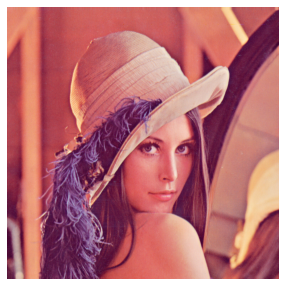

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
src = cv2.imread('/content/drive/MyDrive/ML assignment datasets/Lena.png')
img = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 5))
plt.axis("off")
plt.imshow(img)

In [7]:
def convert_image_matrix(img_name):
    src = cv2.imread(img_name)
    img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    name, ext = img_name.split('.')
    plt.imsave(str(name + '_gray.' + ext), img, cmap='gray')
    
    gray_img = cv2.imread(str(name + '_gray.' + ext), 0)
    gimg_shape = gray_img.shape
    gimg_mat = []
    for i in range(0, gimg_shape[0]):
        row = []
        for j in range(0, gimg_shape[1]):
            pixel = gray_img.item(i, j)
            row.append(pixel)
        gimg_mat.append(row)
    gimg_mat = np.array(gimg_mat)
    return gimg_mat

In [8]:
def get_sub_matrices(orig_matrix, kernel_size):
    width = len(orig_matrix[0])
    height = len(orig_matrix)
    if kernel_size[0] == kernel_size[1]:
        if kernel_size[0] > 2:
            orig_matrix = np.pad(orig_matrix, kernel_size[0] - 2, mode='constant')
        else: pass
    else: pass
    
    giant_matrix = []
    for i in range(0, height - kernel_size[1] + 1):
        for j in range(0, width - kernel_size[0] + 1):
            giant_matrix.append(
                [
                    [orig_matrix[col][row] for row in range(j, j + kernel_size[0])]
                    for col in range(i, i + kernel_size[1])
                ]
            )
    img_sampling = np.array(giant_matrix)
    return img_sampling

In [9]:
def get_transformed_matrix(matrix_sampling, kernel_filter):
    transform_mat = []
    for each_mat in matrix_sampling:
        transform_mat.append(
            np.sum(np.multiply(each_mat, kernel_filter))
        )
    reshape_val = int(math.sqrt(matrix_sampling.shape[0]))
    transform_mat = np.array(transform_mat).reshape(reshape_val, reshape_val)
    return transform_mat

In [10]:
def original_VS_convoluted(img_name, kernel_name, convoluted_matrix):
    name, ext = img_name.split('.')
    cv2.imwrite(str(name + '_' + kernel_name + '.' + ext), convoluted_matrix)
    orig = cv2.imread(str(name + '_gray.' + ext))
    conv = cv2.imread(str(name + '_' + kernel_name + '.' + ext))
    
    fig = plt.figure(figsize=(16, 25))
    ax1 = fig.add_subplot(2,2,1)
    ax1.axis("off")
    ax1.title.set_text('Original')
    ax1.imshow(orig)
    ax2 = fig.add_subplot(2,2,2)
    ax2.axis("off")
    ax2.title.set_text(str(kernel_name).title())
    ax2.imshow(conv)
    return True

True

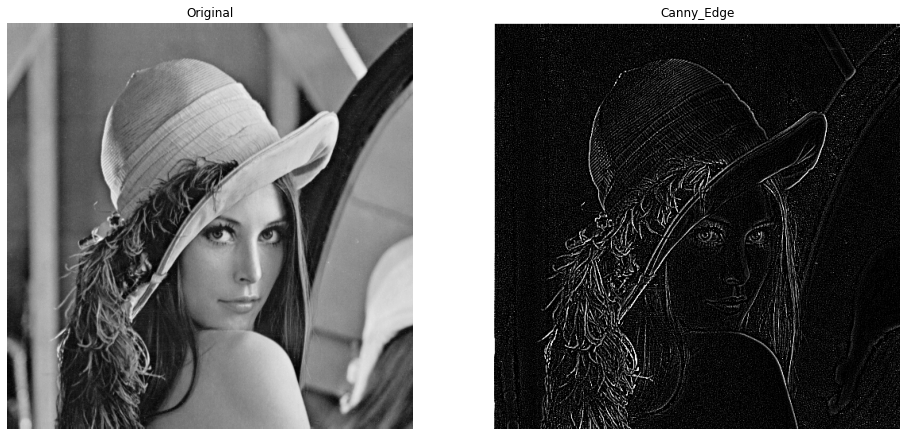

In [12]:
img_name = '/content/drive/MyDrive/ML assignment datasets/Lena.png'
img_mat = convert_image_matrix(img_name)
identity_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted(img_name,'canny_edge', transform_mat)

**Blur**

True

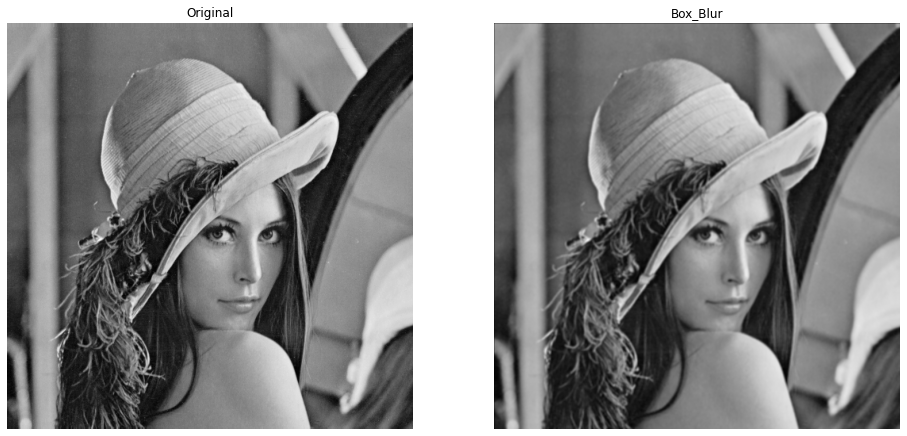

In [17]:
img_name = '/content/drive/MyDrive/ML assignment datasets/Lena.png'
img_mat = convert_image_matrix(img_name)
identity_kernel = (1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted(img_name,'box_blur', transform_mat)

True

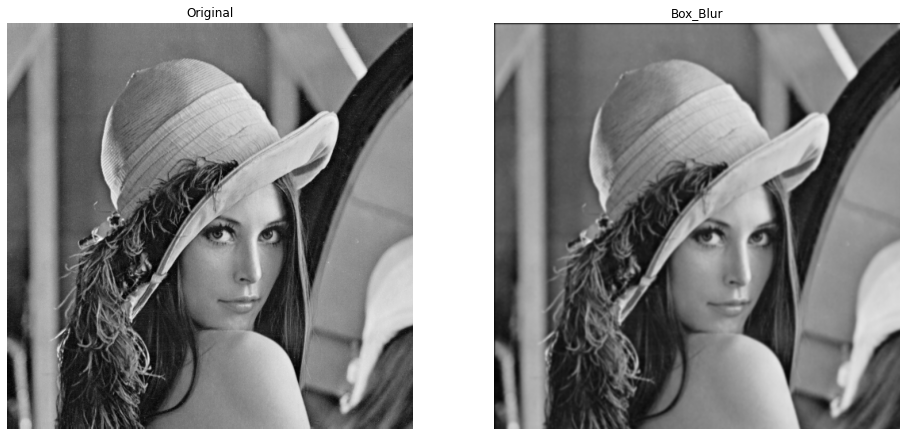

In [19]:
img_name = '/content/drive/MyDrive/ML assignment datasets/Lena.png'
img_mat = convert_image_matrix(img_name)
identity_kernel = (1/273)*np.array([[1,4,7,4,1],[4,16,26,16,4],[7,26,41,26,7],[4,16,26,16,4],[1,4,7,4,1]])
img_sampling = get_sub_matrices(img_mat, identity_kernel.shape)
transform_mat = get_transformed_matrix(img_sampling, identity_kernel)
original_VS_convoluted(img_name,'box_blur', transform_mat)